In [1]:
import pandas as pd
import numpy as np
import gc

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score, auc, precision_score, recall_score

SEED = 1996
FOLDS = 5
TARGET = "y"
VERSION = "test"

In [26]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")
df_sub = pd.read_csv("../data/submission_sample.csv")
df_meta = pd.read_csv("../data/metadata.csv")

In [3]:
df = pd.concat([df_train, df_test], axis=0)
df.shape

(35306, 70)

# New ideias

In [ ]:
# mean var55 -> y == 1
# mean var55 -> y == 0

In [ ]:
# count var55_r2 -> y == 1
# count var55_r2 -> y == 0

In [14]:
df_counts = df_train.groupby(['var4'])['y'].value_counts().unstack().fillna(0)
df_counts

y,0,1
var4,,
-999,928.0,8.0
0,1.0,0.0
1,1.0,0.0
11,1.0,0.0
13,1.0,0.0
...,...,...
32396,1.0,0.0
32398,1.0,0.0
32401,1.0,0.0


In [32]:
df_train['var4'].value_counts().head(25)

-999      936
 976        4
 29895      3
 15576      3
 3924       3
 30810      3
 31056      3
 30745      3
 29031      2
 30177      2
 31607      2
 27349      2
 4384       2
 30982      2
 25935      2
 31078      2
 4157       2
 30911      2
 17966      2
 17178      2
 31084      2
 29877      2
 11901      2
 28310      2
 18623      2
Name: var4, dtype: int64

In [40]:
df_train[df_train['var8'] != -999]['var8'].max()

28

In [ ]:
 0 1 2 3 4
 2 9 4 4 2
 2 6 8 9 na
na 2 6 8 9

In [48]:
df_train[df_train['var4'] != -999]['var4'].astype(str)

0        29442
1        13684
2        10232
3         2689
4        29428
         ...  
14117    14818
14118    28766
14120    23761
14121    19593
14122     4612
Name: var4, Length: 13187, dtype: object

# Var4 dist

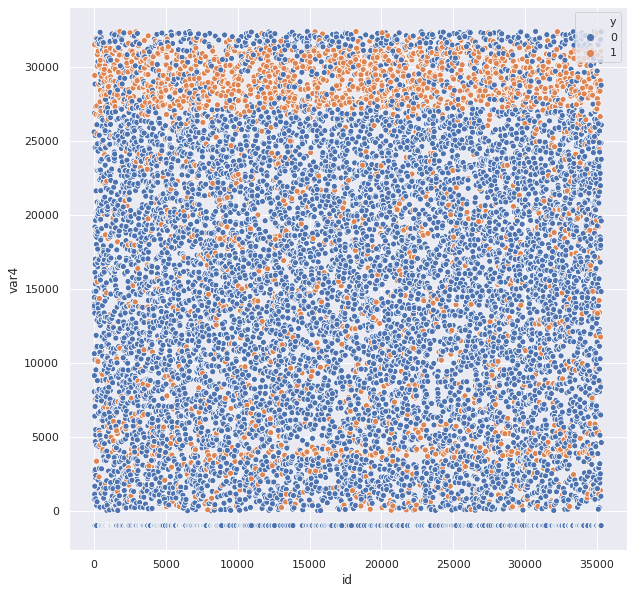

In [5]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_train, x='id', y='var4', hue='y')

<Figure size 720x720 with 0 Axes>

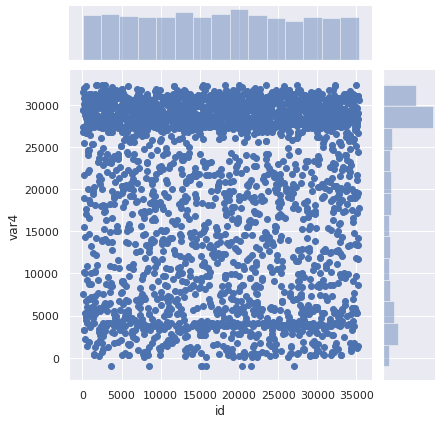

In [10]:
plt.figure(figsize=(10, 10))
sns.jointplot(data=df_train[df_train['y'] == 1], x='id', y='var4')

<Figure size 720x720 with 0 Axes>

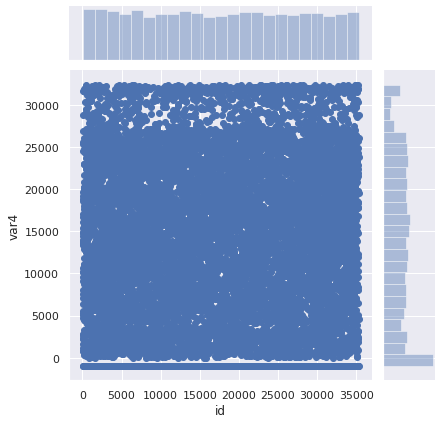

In [11]:
plt.figure(figsize=(10, 10))
sns.jointplot(data=df_train[df_train['y'] == 0], x='id', y='var4')

In [12]:
imp_cols = ['var4', 'var55', 'var56', 'var63', 'var8']

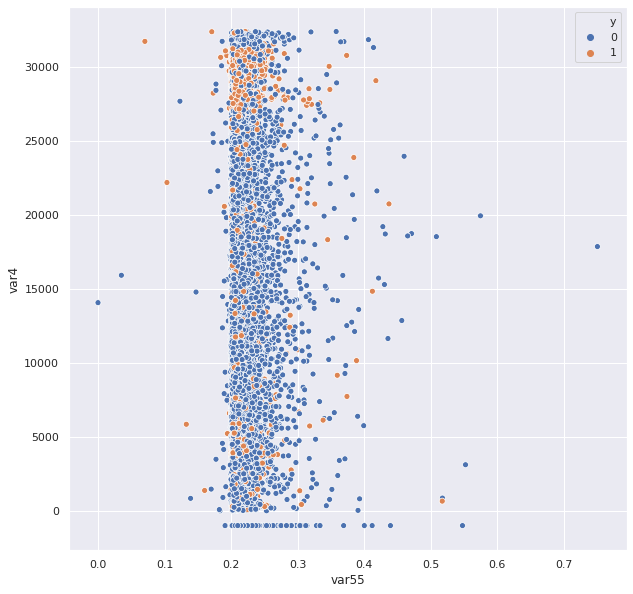

In [14]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_train, x='var55', y='var4', hue='y')

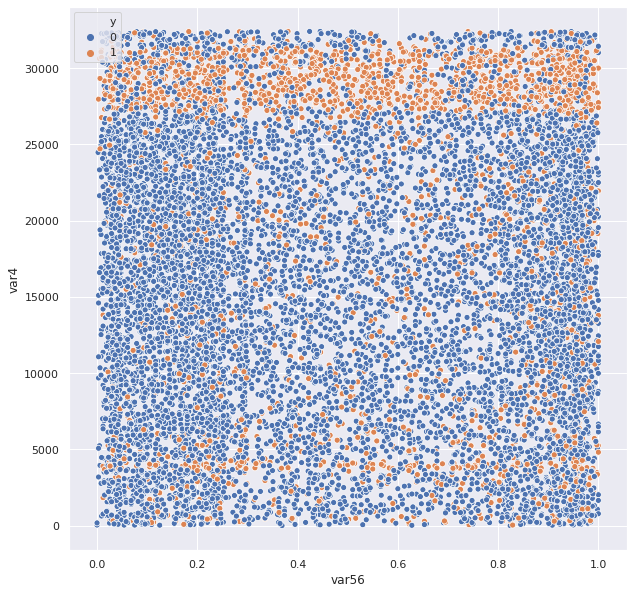

In [16]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_train.replace(-999, np.nan), x='var56', y='var4', hue='y')

In [27]:
df_test_preds = pd.read_csv("../output/mario/test_preds_lgbm-v3.csv")
df_test_preds.head()

,id,predicted,y
0,0,1,0.974565
1,2,1,0.898183
2,4,0,0.756021
3,7,0,0.795421
4,15,1,0.816872


In [28]:
df_test = pd.concat([df_test, df_test_preds.drop("id", axis=1)], axis=1)
df_test.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var61,var62,var63,var64,var65,var66,var67,var68,predicted,y
0,0,5,126,1353,28956,743,1289,27,-999,1,...,0.166641,0.049108,0.986882,0.016683,-999.0,-999.0,0.176471,0.253676,1,0.974565
1,2,6,126,1446,7803,5151,935,35,-999,3,...,0.217009,0.144403,0.892028,0.038323,-999.0,-999.0,0.147059,0.099265,1,0.898183
2,4,5,44,243,4325,1109,1903,33,24,1,...,0.330680,0.072864,0.930373,0.021052,-999.0,-999.0,0.294118,0.136029,0,0.756021
3,7,4,53,419,743,7750,183,35,-999,3,...,0.244936,0.158088,0.986882,0.022649,-999.0,-999.0,0.294118,0.220588,0,0.795421
4,15,4,126,1863,22693,5625,965,9,-999,3,...,0.252794,0.080405,0.944501,0.021806,-999.0,-999.0,0.352941,0.113971,1,0.816872


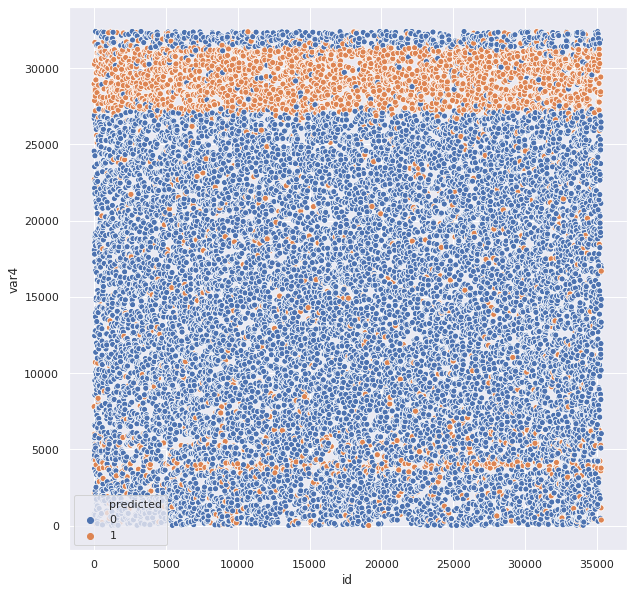

In [30]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_test.replace(-999, np.nan), x='id', y='var4', hue='predicted')

<Figure size 720x720 with 0 Axes>

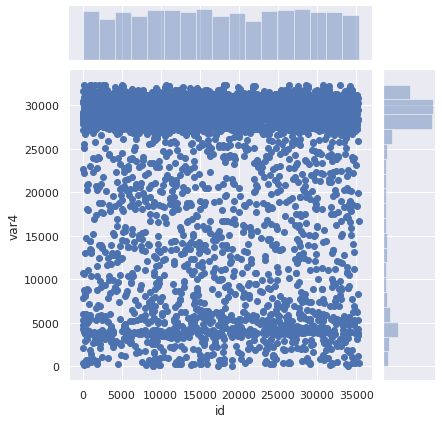

In [32]:
plt.figure(figsize=(10, 10))
sns.jointplot(data=df_test.replace(-999, np.nan)[df_test['predicted'] == 1], x='id', y='var4')

<Figure size 720x720 with 0 Axes>

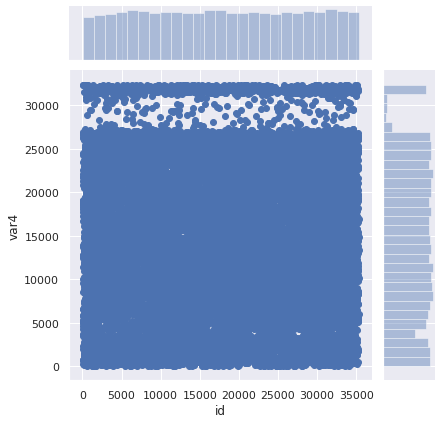

In [33]:
plt.figure(figsize=(10, 10))
sns.jointplot(data=df_test.replace(-999, np.nan)[df_test['predicted'] == 0], x='id', y='var4')

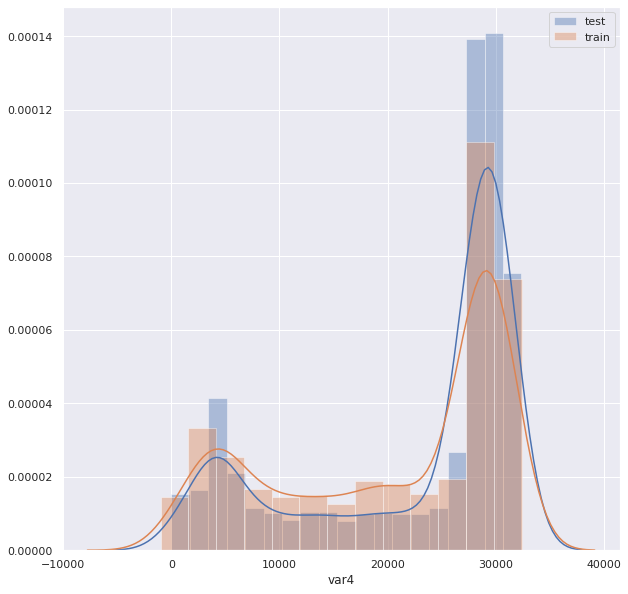

In [37]:
plt.figure(figsize=(10, 10))
sns.distplot(df_test[df_test['predicted'] == 1]['var4'], label='test')
sns.distplot(df_train[df_train['y'] == 1]['var4'], label='train')
plt.legend()
plt.show()

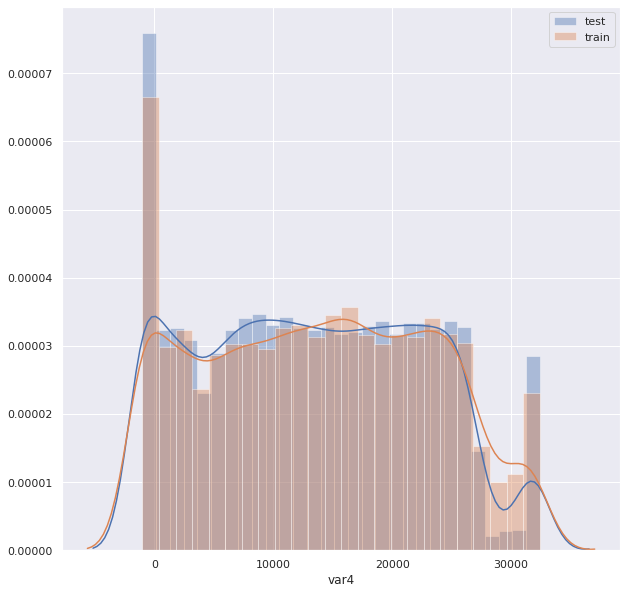

In [38]:
plt.figure(figsize=(10, 10))
sns.distplot(df_test[df_test['predicted'] == 0]['var4'], label='test')
sns.distplot(df_train[df_train['y'] == 0]['var4'], label='train')
plt.legend()
plt.show()

In [39]:
df_train_preds = pd.read_csv("../output/mario/train_preds_lgbm-v3.csv")
df_train_preds.head()

,id,predicted,y
0,1,1,0.970255
1,8,0,0.330973
2,30,0,0.707507
3,43,0,0.500531
4,46,1,0.964248


In [42]:
df_train_preds['predicted'].value_counts(normalize=True)

0    0.797847
1    0.202153
Name: predicted, dtype: float64

In [41]:
df_train['y'].value_counts(normalize=True)

0    0.798202
1    0.201798
Name: y, dtype: float64

In [50]:
df_test_preds['predicted'].value_counts(normalize=True)

0    0.799745
1    0.200255
Name: predicted, dtype: float64

In [49]:
df_train.shape[0]/df.shape[0], df_test.shape[0]/df.shape[0]

(0.4000169942785929, 0.5999830057214072)

In [59]:
df_train_preds['y']

0        0.970255
1        0.330973
2        0.707507
3        0.500531
4        0.964248
           ...   
14118    0.764164
14119    0.009204
14120    0.038584
14121    0.504249
14122    0.608711
Name: y, Length: 14123, dtype: float64

In [54]:
f1_score(df_train['y'], df_train_preds['predicted'])

0.6857142857142858

In [55]:
th = df_train_preds['y'].quantile(0.798202)
new_y_label = np.where(df_train_preds['y'] > th, 1, 0)
f1_score(df_train['y'], new_y_label)

0.6852631578947368